In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

from sklearn.datasets import make_blobs

sns.set_theme(style='darkgrid')

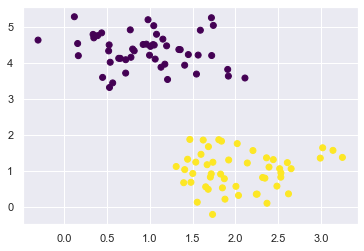

In [14]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=0.5,random_state=0)

plt.scatter(X[:,0],X[:,1],c = y,cmap='viridis')

In [41]:
class SoftSVM:
    def __init__(self,C):
        self.C = C
        self.w = None
        self.b = None
        
    def __decesion_function(self,X):
        return X@self.w + self.b
    
    def __margin(self,X,y):
        y_pred = self.__decesion_function(X)
        return y*y_pred
        
        
    def __cost(self,margin):
        return 1/2*(np.transpose(self.w)@self.w) + self.C*np.sum(np.maximum(0,(1-margin)))
    
    def fit(self,X,y,epochs = 1000,lr=0.001):
        self.w = np.zeros(X.shape[-1])
        self.b = 0
        self.losses = []
        
        for _ in range(epochs):
            margin = self.__margin(X,y)
            self.losses.append(self.__cost(margin))
            
            missclassified_points = np.where(margin<=1)[0]
            
            d_w = self.w - self.C*(y[missclassified_points].dot(X[missclassified_points]))
            self.w -= lr*d_w
            
            d_b = -self.C*np.sum(y[missclassified_points])
            self.b -= lr*d_b
            
            
        print(f'The final loss is: {self.losses[-1]}')
        return self.losses
    
#     def fit_mbgd(self,X,y,lr = 0.001,epochs=1000,batch_size = 10):
#         self.w = np.zeros(X.shape[-1])
#         self.b = 0
#         self.losses_gd = []
        
#         for _ in range(epochs):
#             shuffled_indices = np.random.permutation(X.shape[0])
            
#             X_shuffeled = X[shuffled_indices]
#             y_shuffeled = y[shuffled_indices]
            
#             for i in range(0,X.shape[0],batch_size):
#                 xi = X_shuffeled[i:i+batch_size]
#                 yi = y_shuffeled[i:i+batch_size]
                
#                 margin = self.__margin(xi,yi)
                
#                 self.losses_gd.append(self.__cost(margin))
                
#                 missclassified_points = np.where(margin<=1)[0]
                
#                 d_w = (2/batch_size)*(self.w - self.C*(yi[missclassified_points].dot(xi[missclassified_points])))
                
#                 self.w -= lr*d_w
                
#                 d_b = (2/batch_size)*(self.w - self.C*np.sum(yi[missclassified_points]))
                
#                 self.b -= lr*d_b
                
#             return self.losses_gd

In [59]:
svm = SoftSVM(C = 0.11)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
losses = svm.fit(X_train,y_train)

The final loss is: 4.469038834542286


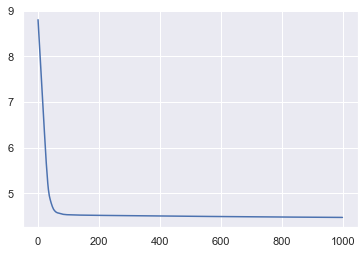

In [62]:
plt.plot(losses)

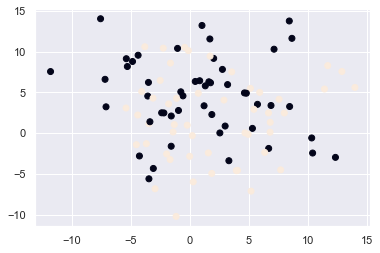

In [64]:
X,y = make_blobs(n_samples=100,n_features=2,cluster_std=5,centers=2,random_state=0)
y = np.where(y==0,-1,1)
plt.scatter(X[:,0],X[:,1],c=y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

The final loss is: 7.050579565384086


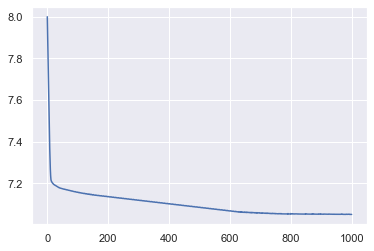

In [69]:
svm = SoftSVM(C=0.1)
loss = svm.fit(X_train,y_train)
plt.plot(loss)